# Decision Trees
*Definition:* A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails, a problem feature), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes) -- Wikipedia

A decision tree typically starts with a single node, which branches into possible outcomes. Each of those outcomes leads to additional nodes, which branch off into other possibilities.

Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods.

**Note: A decision tree builds upon iteratively asking questions to partition data.(see example 1 & 2)**

### Example 1

![Decision Tree Example](./images/a_decision_tree_example.jpg)

### Example 2

![Decision Tree Example](./images/tree_sample.png)

### Example 3

![Decision Tree Example 2](./images/tree_example_2.png)

### Common Terms used with Trees

** *Root Node*: The very top node is called a Root Node or just a Node.
It represents entire population or sample and this further gets divided into two or more homogeneous sets.

** *Splitting*: It is a process of dividing a node into two or more sub-nodes.

** *Decision Node*: When a sub-node splits into further sub-nodes, then it is called decision node.

** *Leaf/ Terminal Node*: Nodes which do not split is called Leaf or Terminal node.

** *Pruning*: When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.
<br> -- The performance of a tree can be further increased by pruning. This way, we reduce the complexity of the tree, and thus increasing its predictive power by reducing overfitting.</br>

-- Pruning is a data compression technique that reduces the size of decision trees by removing sections of the tree that are non-critical and redundant to classify instances.  (Wikipedia). The parts that it removes from the tree are the parts that do not provide the power to classify instances.

-- It reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting. Overfitting in decision trees occurs when the tree becomes too complex and captures the noise in the training data, rather than the underlying pattern.

** Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood.


![Pruning- Before and After](./images/decision_tree_prunning.png)

** *Branch / Sub-Tree*: A sub section of entire tree is called branch or sub-tree.

![SubTree](./images/Subtree.png)

### Building Decision Trees : Algorithm

--> Build tree: Steps

* Start with data at root node.

* Select an attribute and formulate a logical test on attribute.

* Branch on each outcome of the test, and move subset of examples satisfying that outcome to corresponding child node.

* Recurse on each child node.

* Repeat until leaves are “pure”, i.e., have example from a single class, or “nearly pure”, i.e., majority of examples are from the same class.

* Prune tree.

--> Remove subtrees that do not improve accuracy.

### Split Criterias

<strong>Node splitting</strong>, or simply splitting, is the process of dividing a node into multiple sub-nodes to create relatively pure nodes. A decision tree makes decisions by splitting nodes into sub-nodes. There are multiple ways of doing this, which can be broadly divided into two categories based on the type of target variable:

1. Regression

    -- Variance(lowest)
2. Categorical

    -- Gini Impurity

    -- information Gain
    
    -- Chi-Square**

### 1. Decision Tree Splitting Method(Regression) : Reduction in Variance

Here we use variance as a measure for deciding the feature on which node is split into child nodes. Variance is used for calculating the homogeneity of a node. If a node is entirely homogeneous, then the variance is zero. *The lesser the Variance,the better the split*.

<strong>Steps:</strong>

1. For each split, individually calculate the variance of each child node.

2. Calculate the variance of each split as the weighted average variance of child nodes.

3. Select the split with the lowest variance.

4. Perform steps 1-3 until completely homogeneous nodes are achieved.

<strong>Note:</strong> Variance = (Sum(X-mean)^2)/n

#### Note.
With Variance:
<br> ** used when target is continuous. </br>
** split with lower variance is selected.

### 2. Decision Tree Splitting Method(Classification) : Information Gain

For Classification problems, information gain is used for splitting the nodes when the target variable is categorical. It works on the concept of the entropy and is given by:

#### Information Gain = 1 - entropy

higher information gain means more pure nodes. Entropy is used for calculating the purity of a node. Lower the value of entropy, higher is the purity of the node. The entropy of a homogeneous(pure) node is zero. Since we subtract entropy from 1, the Information Gain is higher for the purer nodes with a maximum value of 1. Now, let’s take a look at the formula for calculating the entropy:

#### Entropy = -Sum(P_{i}log2P_{i})

<strong>Steps:</strong>

1. For each split, individually calculate the entropy of each child node.

2. Calculate the entropy of each split as the weighted average entropy of child nodes.

3. Select the split with the lowest entropy or highest information gain.

4. Until you achieve homogeneous nodes, repeat steps 1-3.


#### Note.
With entropy:
<br> ** works only with categorical targets. </br>
** lesser the entropy, higher the homogeneity of nodes.

### 3. Decision Tree Splitting Method(Classification): Gini Impurity

Gini Impurity is a method for splitting the nodes when the target variable is categorical. It is the most popular and the easiest way to split a decision tree. The Gini Impurity value is:

#### Gini Impurity = 1 - Gini

Gini is the probability of correctly labeling a randomly chosen element if it was randomly labeled according to the distribution of labels in the node. Gini says, if we select two items from a population at random then they must be of same class and probability for this is 1, if population is pure. The formula for Gini is:

#### Gini = Sum(p_{i}^2)

Lower the Gini Impurity, higher is the homogeneity of the node. The Gini Impurity of a pure node is zero. 

*Note: The Gini Impurity is preferred to Information Gain because it does not contain logarithms which are computationally intensive.*

<strong>Steps:</strong>
1. Similar to what we did in information gain. For each split, individually calculate the Gini impurity of each child node.

2. Calculate the Gini Impurity of each split as the weighted average Gini Impurity of child nodes.

3. Select the split with the lowest value of Gini Impurity.

4. Until you achieve homogeneous(pure) nodes, repeat steps 1-3.

### Decision Trees Classifier and Regressor

*<strong>Note:</strong>

** In case of Regression Tree, the value obtained by terminal nodes in the training data is the mean response of observation/data falling in that region. Thus, if an unseen data observation falls in that region, we’ll make its prediction with mean value.

** In case of Classification Tree, the value (class) obtained by terminal node in the training data is the mode of observations/data falling in that region. Thus, if an unseen data observation falls in that region, we’ll make its prediction with mode value.

*<strong>Important:</strong> This splitting process is continued until a user defined stopping criteria is reached or all terminal nodes are pure.*

In [1]:
#import libraries
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
#load dataset
X,y = load_breast_cancer(return_X_y=True)

#train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#initialize the decisiontreeclassifier
dtc = tree.DecisionTreeClassifier(max_depth=5,random_state=42,criterion='entropy')
#criterion is the function to measure the quality of a split.

In [7]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
#fit and return f1_score
dtc.fit(X_train,y_train)

f1_score(y_test,dtc.predict(X_test),average=None)

array([0.93442623, 0.96363636])

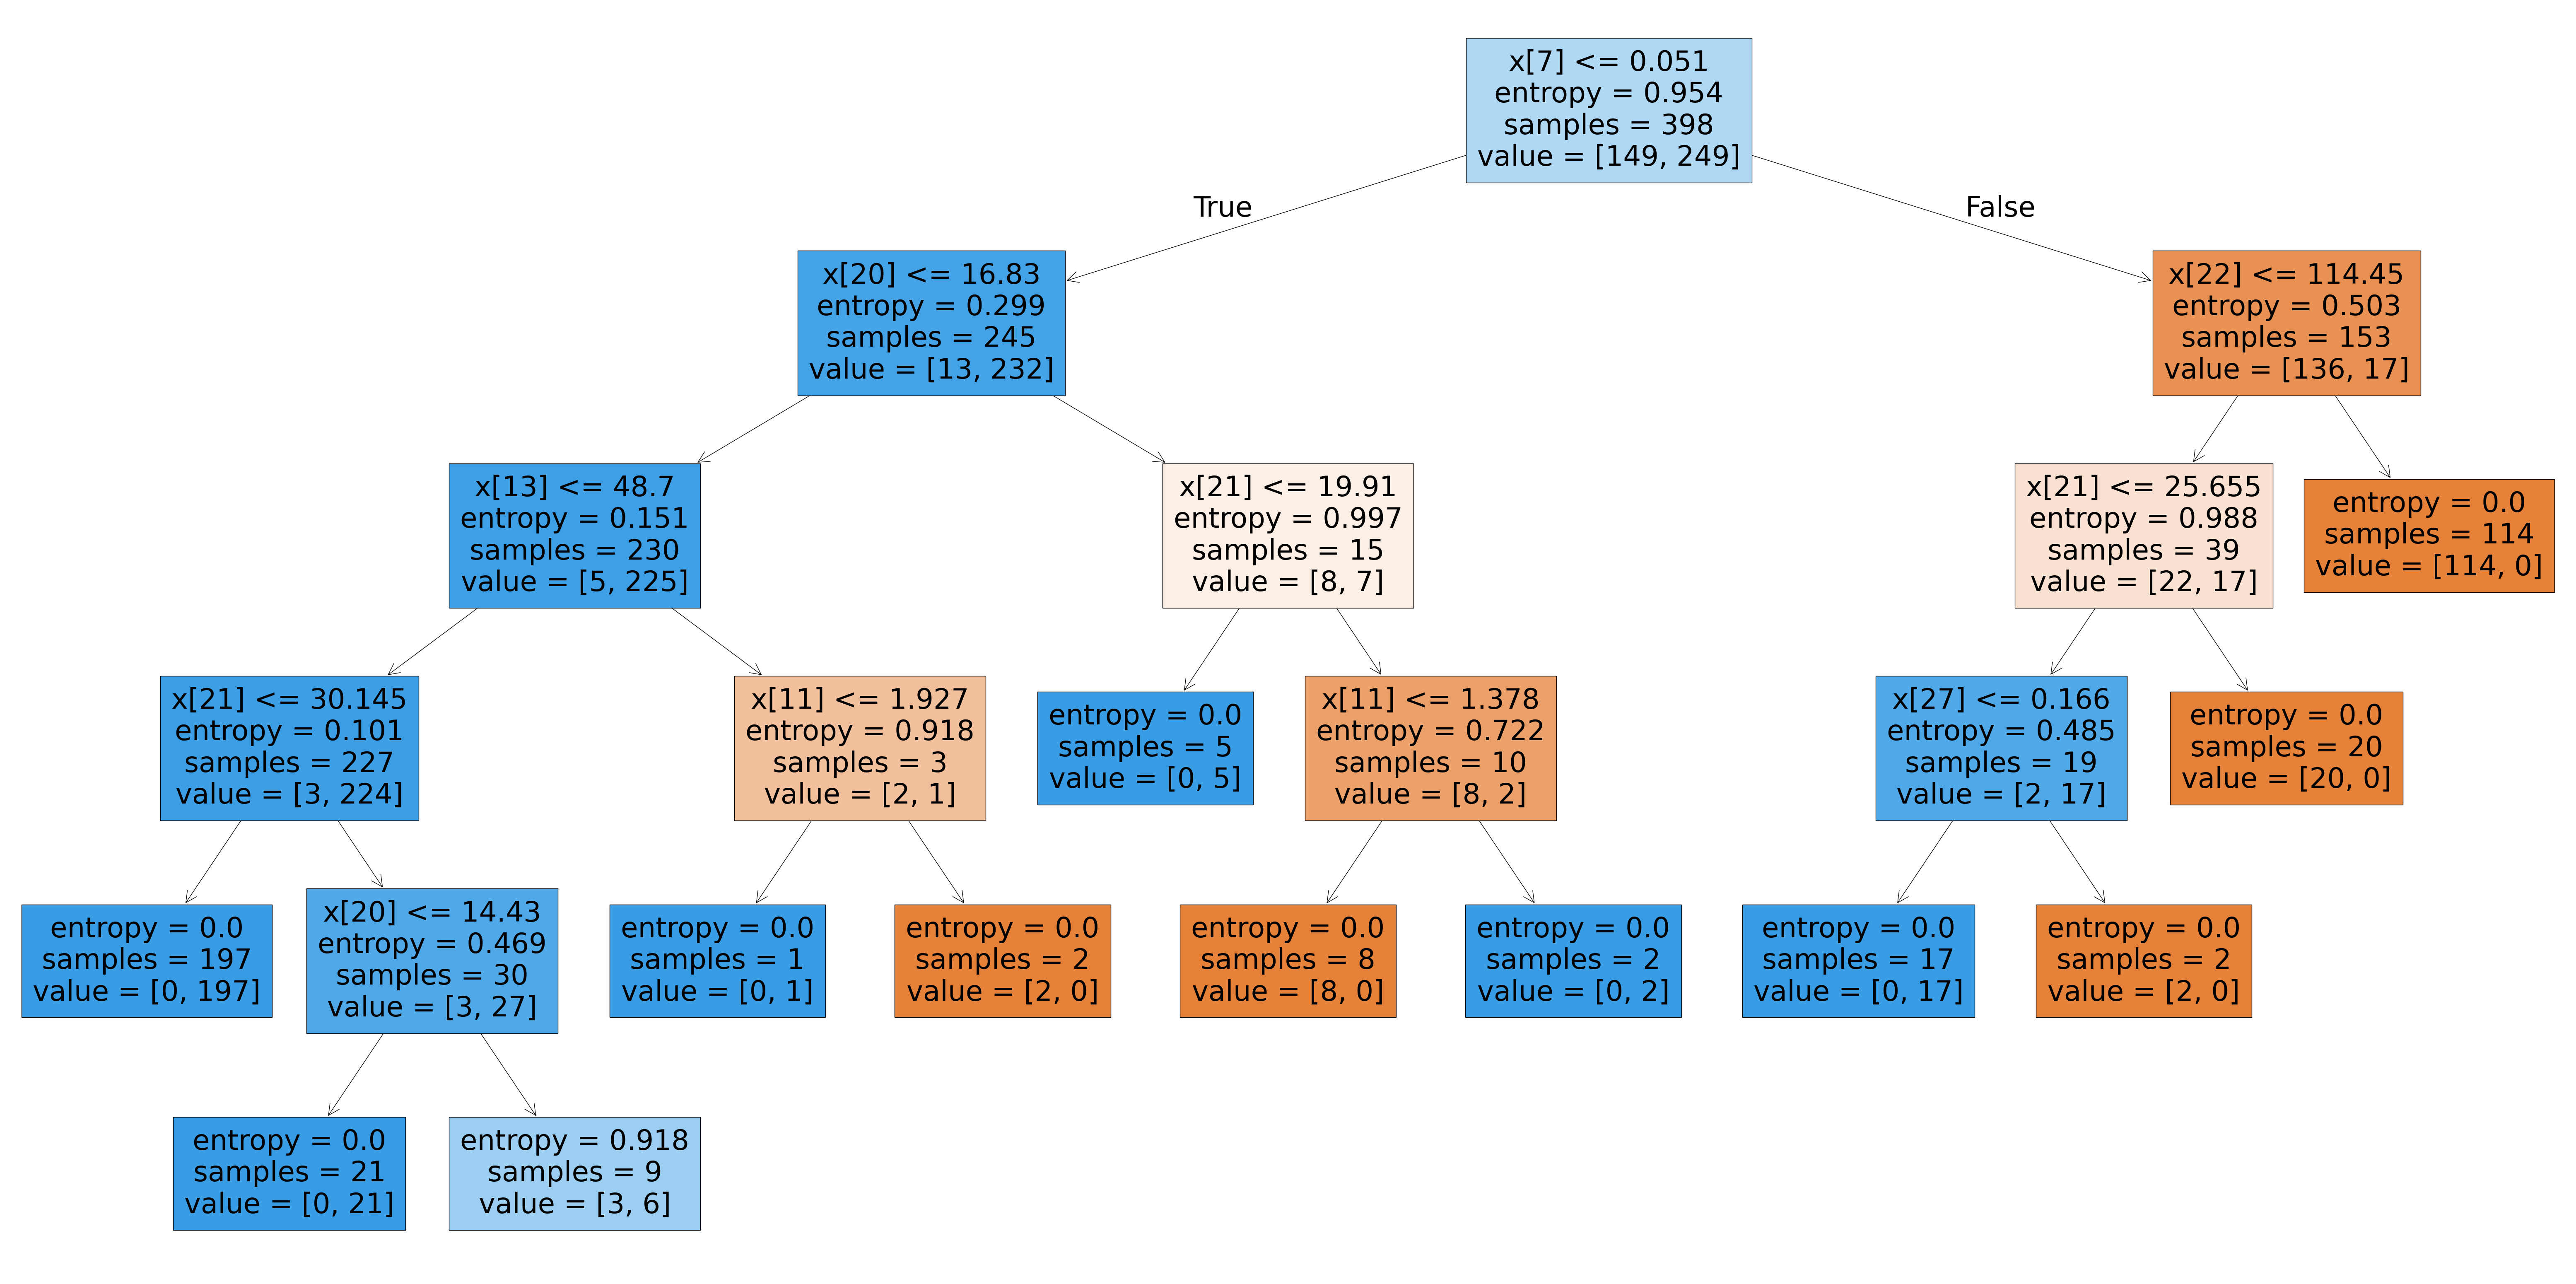

In [4]:
#show decision tree
plt.rcParams["figure.figsize"] = (80,40)
tree.plot_tree(dtc,filled = True);
plt.savefig('./images/tree_example.png')

In [8]:
#load dataset
X,y = load_wine(return_X_y=True)

#train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#initialize the decisiontreeclassifier
dtc = tree.DecisionTreeClassifier(max_depth=5,random_state=42,criterion='gini')
#criterion is the function to measure the quality of a split.

In [9]:
#fit and return f1_score
dtc.fit(X_train,y_train)

f1_score(y_test,dtc.predict(X_test),average=None)

array([0.94736842, 0.97674419, 0.96296296])

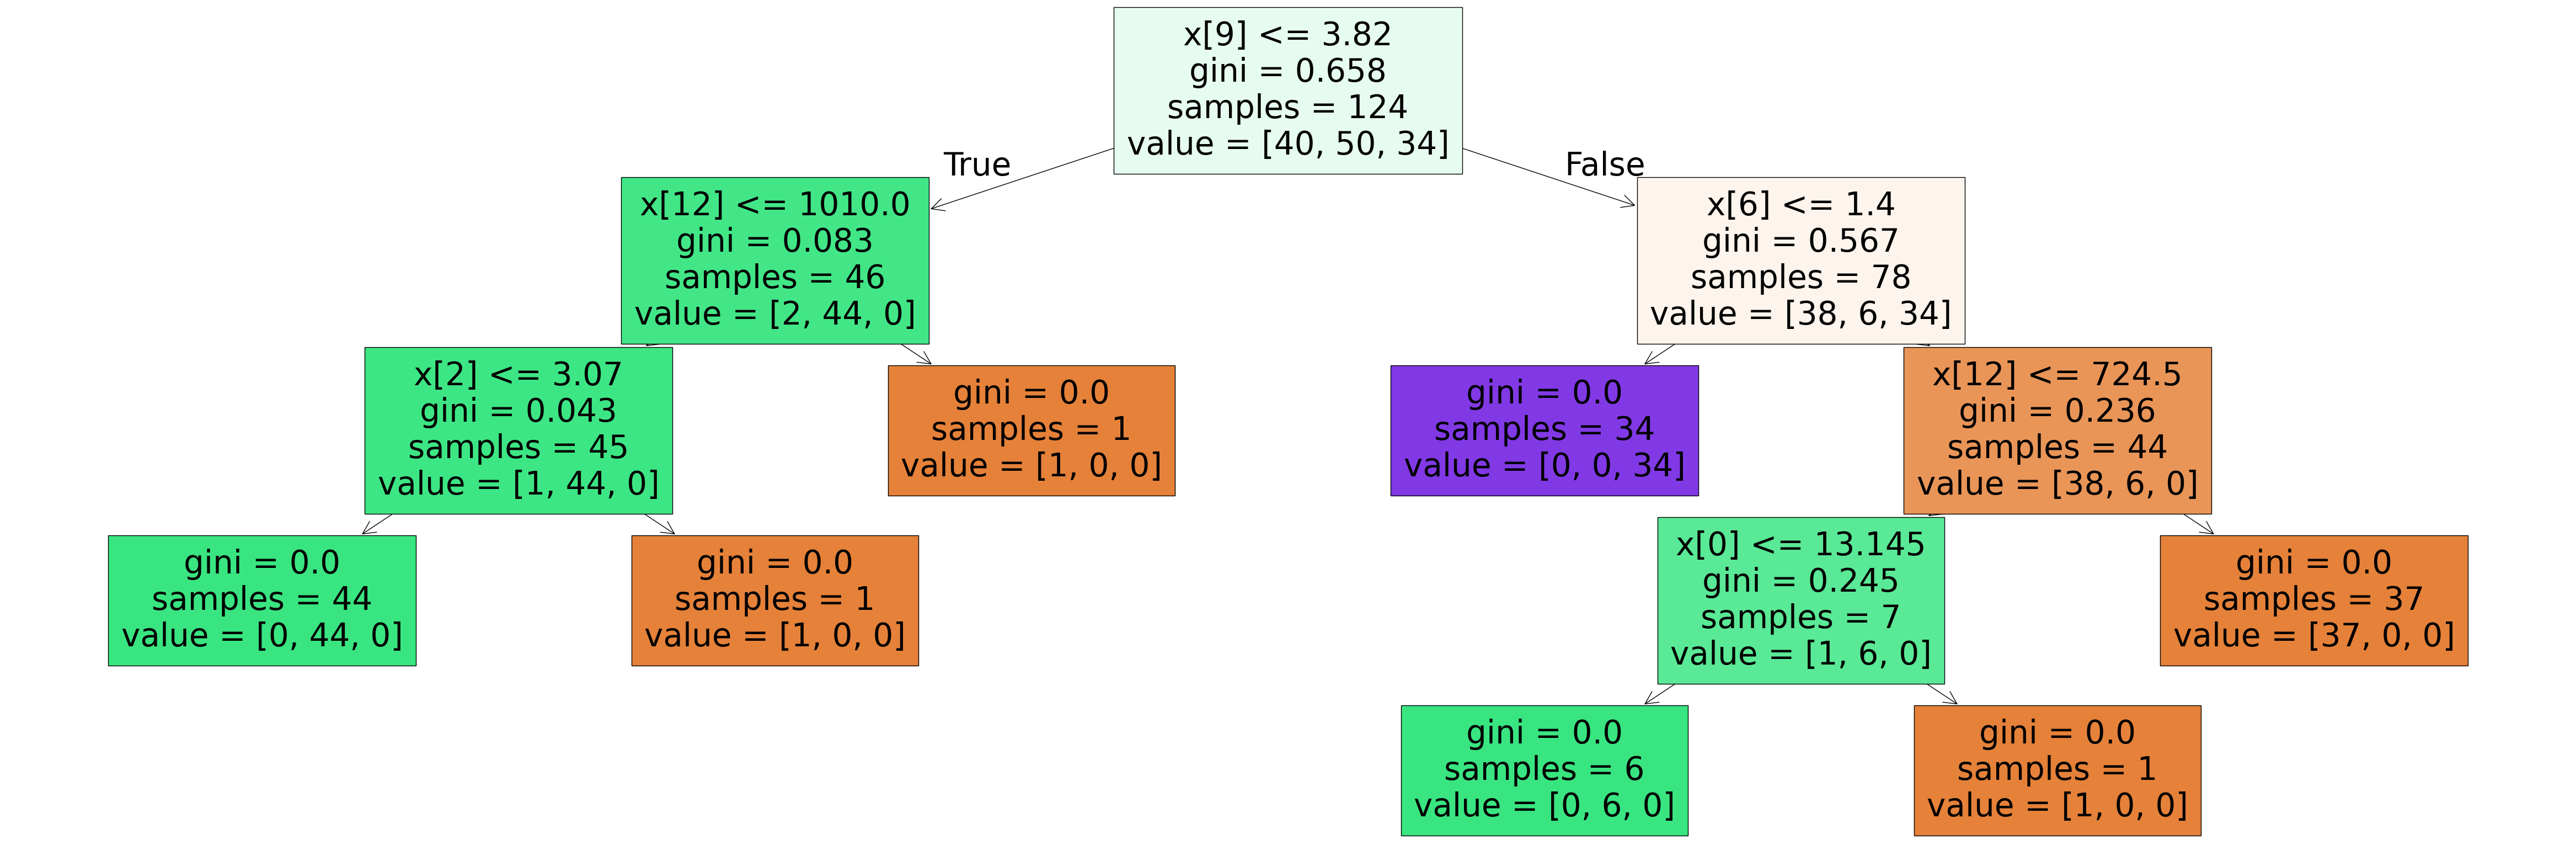

In [10]:
#show decision tree
plt.rcParams["figure.figsize"] = (60,20)
tree.plot_tree(dtc,filled = True);
plt.savefig('./images/tree_example_wine.png')

Exercise: From data load the housing.csv file. split into train,test. (70,30)

Build a decisiontreeregessor(try using different criteria), fit it and return the score and the plot of the tree. 
Note: -- sep='\\s+' --

In [ ]:
#load dataset
housingdata = pd.read_csv("../da")
X,y = load_breast_cancer(return_X_y=True)

#train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#initialize the decisiontreeclassifier
dtc = tree.DecisionTreeClassifier(max_depth=5,random_state=42,criterion='entropy')
#criterion is the function to measure the quality of a split.